## Question 5.1

In [1]:
using Cropbox

WebIO._IJuliaInit()

### How much biomass can humans gain or lose only through breathing (See Meerman & Brown, 2014)? ###
Estimate potential weight change through breathing only for 10 days for a person whose body mass is 70 kg assuming a constant breathing (e.g., gas-exchange) rate of 6.0 $\mathrm{L\ min^{-1}}$ (0.5 L per breathing, 12 breaths/minute) and respiratory quotient (RQ = Volume of CO2 released/Volume of O2 absorbed) of 0.8 (Meerman & Brown, 2014; Patel, Kerndt, & Bhardwaj, 2023). Humans do not absorb all of the inhaled O2 for metabolism; inhaled air contains 21% O2 while exhaled breath contains approximately 16%O2 and 5% CO2 by volume (Pleil, Ariel Geer Wallace, Davis, & Matty, 2021). Provide both absolute and relative weight changes over this period through breathing only.

In [2]:
@system q51(Controller) begin
    t(context.clock.time) ~ track(u"d")
    W0: initial_body_mass      => 70   ~ preserve(parameter, u"kg")
    RQ: respiratory_quotient   =>  1.0 ~ preserve(parameter)
    br: breathing_rate         =>  6.0 ~ preserve(parameter, u"l/minute")
    CO2: MW_of_CO2             => 44.0 ~ preserve(parameter, u"g")
    O2: MW_of_O2               => 32.0 ~ preserve(parameter,u"g")
    V: molar_air_volume        => 22.4 ~ preserve(parameter, u"l")
    air_in(O2, br, V): inhale_MW => 0.21*O2*br/V ~ track(u"g/minute")
    air_out(O2, CO2, br, RQ, V): exhale_MW   => (0.16*O2+0.05*RQ*CO2)*br/V ~ track(u"g/minute")
    W(air_in, air_out): body_mass =>  begin
        air_in - air_out
    end ~ accumulate(init = W0, u"kg")
    ΔW(air_in, air_out): delta_mass => begin
        air_in - air_out
    end ~ accumulate(init = 0, u"kg")
     
end

q51

In [3]:
c0 = :Clock => :step => 1u"hr"
stop = 10u"d"

10 d

In [4]:
simulate(q51; stop, config = c0, snap=1u"d")

Row,time,t,W0,RQ,br,CO2,O2,V,air_in,air_out,W,ΔW
,Quantity…,Quantity…,Quantity…,Float64,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…
1,0.0 hr,0.0 d,70.0 kg,1.0,6.0 L minute⁻¹,44.0 g,32.0 g,22.4 L,1.8 g minute⁻¹,1.96071 g minute⁻¹,70.0 kg,0.0 kg
2,24.0 hr,1.0 d,70.0 kg,1.0,6.0 L minute⁻¹,44.0 g,32.0 g,22.4 L,1.8 g minute⁻¹,1.96071 g minute⁻¹,69.7686 kg,-0.231429 kg
3,48.0 hr,2.0 d,70.0 kg,1.0,6.0 L minute⁻¹,44.0 g,32.0 g,22.4 L,1.8 g minute⁻¹,1.96071 g minute⁻¹,69.5371 kg,-0.462857 kg
4,72.0 hr,3.0 d,70.0 kg,1.0,6.0 L minute⁻¹,44.0 g,32.0 g,22.4 L,1.8 g minute⁻¹,1.96071 g minute⁻¹,69.3057 kg,-0.694286 kg
5,96.0 hr,4.0 d,70.0 kg,1.0,6.0 L minute⁻¹,44.0 g,32.0 g,22.4 L,1.8 g minute⁻¹,1.96071 g minute⁻¹,69.0743 kg,-0.925714 kg
6,120.0 hr,5.0 d,70.0 kg,1.0,6.0 L minute⁻¹,44.0 g,32.0 g,22.4 L,1.8 g minute⁻¹,1.96071 g minute⁻¹,68.8429 kg,-1.15714 kg
7,144.0 hr,6.0 d,70.0 kg,1.0,6.0 L minute⁻¹,44.0 g,32.0 g,22.4 L,1.8 g minute⁻¹,1.96071 g minute⁻¹,68.6114 kg,-1.38857 kg
8,168.0 hr,7.0 d,70.0 kg,1.0,6.0 L minute⁻¹,44.0 g,32.0 g,22.4 L,1.8 g minute⁻¹,1.96071 g minute⁻¹,68.38 kg,-1.62 kg
9,192.0 hr,8.0 d,70.0 kg,1.0,6.0 L minute⁻¹,44.0 g,32.0 g,22.4 L,1.8 g minute⁻¹,1.96071 g minute⁻¹,68.1486 kg,-1.85143 kg


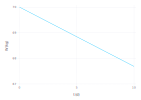

In [5]:
visualize(q51, :t, :W; stop=10u"d", config = c0, kind=:line)